In [3]:
%load_ext autoreload
%autoreload 2

import sys, os
sys.path.insert(0, os.path.abspath(os.path.join(os.path.abspath(''), '.')))

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pickle, datetime

from analyzer import Analyzer

In [12]:
# PATHNAME = ["/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
#             "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_40x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/Control-EGCaMP_exp1_a2_25x10fps_30mins.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi", 
#             "/home/hengji/Documents/hydra/videos/Pre_Bisect_40x_4fps_ex4.avi",
#             "/home/hengji/Documents/hydra/videos/Copy of NGCaMP6_50X_20fps_M1.avi",
#             "/home/hengji/Documents/hydra/videos/EGCaMP_ctrl_30mins_20x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_40x_10fps_mv1.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_30-40x_10fps_mv5.avi",
#             "/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv4.avi"]
PATHNAME = ["D:/hydrafiles/videos/EGCaMP/EGCaMP_ctrl_30mins_20x_10fps_mv1.avi"]
# FPS = [10, 10, 10, 10, 10, 4, 20, 10, 10, 10, 10]
FPS = [10]

In [13]:
# Create an analyzer
anlzr = Analyzer()

# Or... Import a saved one
# anlzr = pickle.load(open("./objects/2020-04-01-23-35.txt", "rb"))

In [14]:
# Add video to the analyzer
# PATHNAME = ["/home/hengji/Documents/hydra/videos/EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi"]
# FPS = [10]
anlzr.add_videos(pathname=PATHNAME, fps=FPS)

In [15]:
# Check the added videos
anlzr.videos()

EGCaMP_ctrl_30mins_20x_10fps_mv1.avi


In [8]:
# anlzr.find_midline(name="EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi")

In [ ]:
anlzr.plot_midline_len()

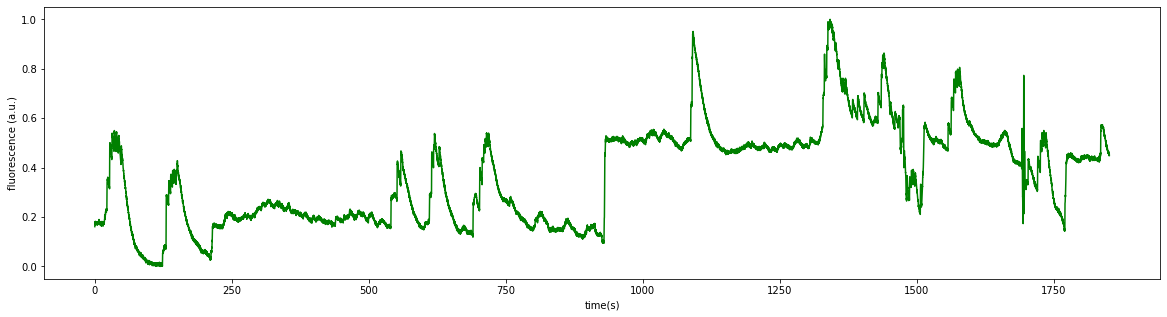

In [16]:
# Trace the fluorescences
anlzr.trace_fluos(normalized=True, 
                  display=False, 
                  plot=True)

In [8]:
# Delete video
anlzr.delete_video("Copy of NGCaMP6_50X_20fps_M1.avi")
anlzr.delete_video("EGCaMP_ctrl_30mins_20x_10fps_mv1.avi")
anlzr.delete_video("EndoRCaMP_ctrl_30mins_40x_10fps_mv1.avi")
anlzr.delete_video("EndoRCaMP_ctrl_30mins_30-40x_10fps_mv5.avi")
anlzr.delete_video("EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv4.avi")
anlzr.videos()

Control-EGCaMP_exp1_a1_30x10fps_5%.avi
EGCaMP_ctrl_30mins_40x_10fps_mv1.avi
Control-EGCaMP_exp1_a2_25x10fps_30mins.avi
EndoRCaMP_ctrl_30mins_35x_10fps_35%intensity_mv3.avi
EndoRCaMP_ctrl_30mins_35x_10fps_79%intensity_mv6.avi
Pre_Bisect_40x_4fps_ex4.avi


In [9]:
# Find peaks
anlzr.find_peaks(plot=False,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

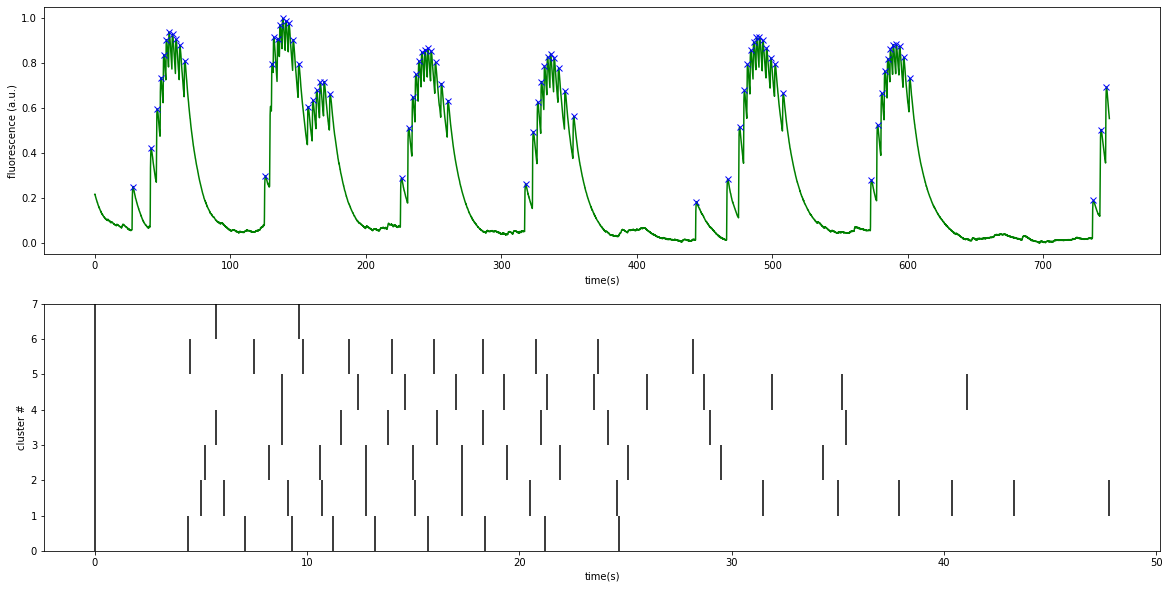

In [6]:
# Find peaks of a specific video
anlzr.find_peaks(name="Control-EGCaMP_exp1_a1_30x10fps_5%.avi",
                plot=True,
                height=0.1,
                wlen=100,
                prominence=0.025,
                min_cb_interval=10)

In [67]:
anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].peak_clusters()

[[0, 44, 71, 93, 112, 132, 157, 184, 212, 247],
 [0, 50, 61, 91, 107, 128, 151, 173, 205, 246, 315, 350, 379, 404, 433, 478],
 [0, 52, 82, 106, 128, 150, 173, 194, 219, 251, 295, 343],
 [0, 57, 88, 116, 138, 161, 183, 210, 242, 290, 354],
 [0, 88, 124, 146, 170, 193, 213, 235, 260, 287, 319, 352, 411],
 [0, 45, 75, 98, 120, 140, 160, 183, 208, 237, 282],
 [0, 57, 96]]

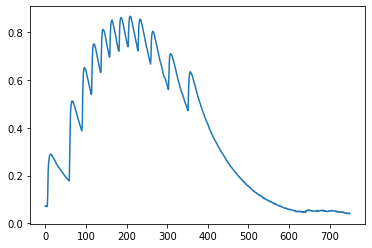

In [63]:
plt.plot(anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].fluo_trace()[2250:3000])

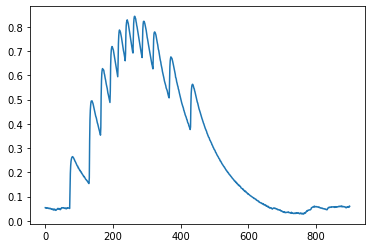

In [66]:
plt.plot(anlzr._videos["Control-EGCaMP_exp1_a1_30x10fps_5%.avi"].fluo_trace()[3100:4000])

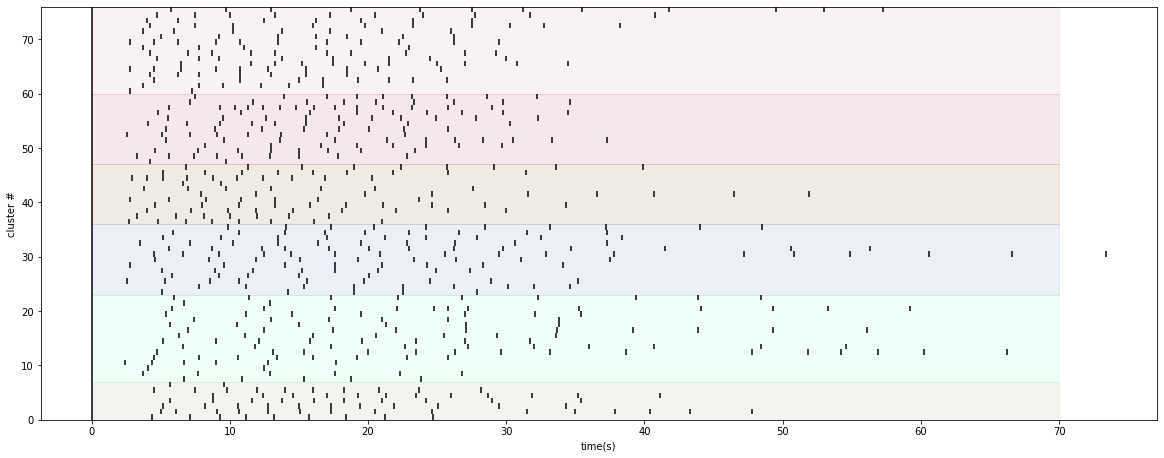

In [8]:
# Plot all spike trains
anlzr.plot_spike_trains()

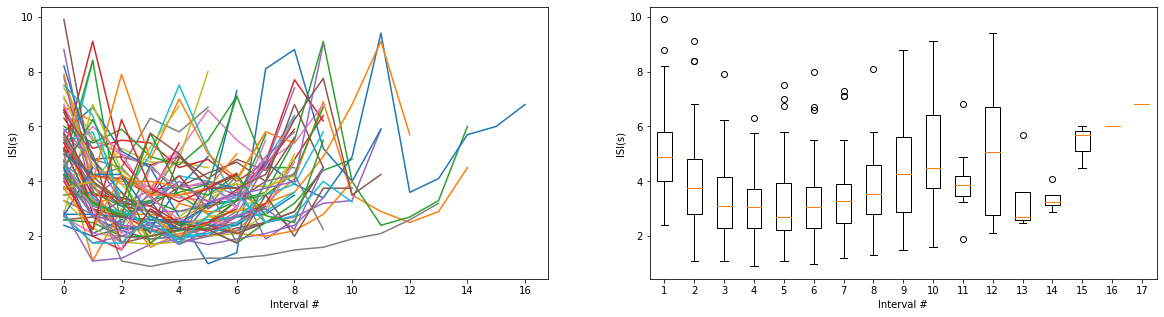

In [16]:
# Plot the statistics of ISI
anlzr.stat_isi()

In [ ]:
# Save anlzr
filename = datetime.datetime.now().strftime("%Y-%m-%d-%H-%M")
filehandler = open("./objects/" + filename + ".txt", 'wb') 
pickle.dump(anlzr, filehandler)